In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

eye_cascade = cv2.CascadeClassifier('haar/haarcascade_eye.xml')
Leye_cascade = cv2.CascadeClassifier('haar/haarcascade_lefteye_2splits.xml')
Reye_cascade = cv2.CascadeClassifier('haar/haarcascade_righteye_2splits.xml')
face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_default.xml')

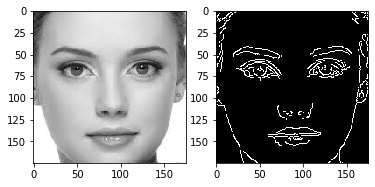

In [3]:
img = cv2.imread('Images/female.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    edges = cv2.Canny(roi_gray, 100, 200)
    plt.subplot(121)
    plt.imshow(roi_gray, cmap='gray')
    plt.subplot(122)
    plt.imshow(edges, cmap='gray')
    plt.show()
    
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,0,255), 2)
        
        
#         eyeroi = img[ey:ey+eh, ex:ex+ew]
#         cv2.imshow('eye', eyeroi)
#         cv2.waitKey(0)
        
#     plt.imshow(roi_gray, cmap='gray')
    
#     Leyes = Leye_cascade.detectMultiScale(roi_gray, 1.3, 5)
#     for (ex, ey, ew, eh) in Leyes:
#         cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
        
#     Reyes = Reye_cascade.detectMultiScale(roi_gray, 1.3, 5)
#     for (ex, ey, ew, eh) in Reyes:
#         cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,0,0), 2)
        
#     cv2.imshow('Image', roi_color)
#     cv2.waitKey(0)

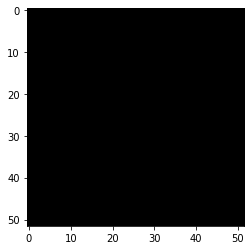

In [12]:
edges = cv2.Canny(roi_gray, 150, 200)

plt.figure(figsize=(20,10))
plt.imshow(edges)

In [1]:

cap = cv2.VideoCapture('Images/vid1.mp4')

if (cap.isOpened() == False):
    print("Error opening video stream")
    

while (cap.isOpened()):
    ret, frame =cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            
#             cv2.rectangle(gray, (x,y), (x+w, y+h), (255,0,0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = Reye_cascade.detectMultiScale(roi_gray, 1.3, 5)
            for (ex,ey,ew,eh) in eyes:
                roi_eye = frame[ey:ey+eh, ex:ex+ew]
                
                cv2.imshow('Eye', roi_eye)
                k = cv2.waitKey(30) & 0xFF
                if k == 27:
                    break
#                 cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
                
                
            
        
#         cv2.imshow('Frame', frame)
        
#         k = cv2.waitKey(30) & 0xFF
#         if k == 27:
#             break
            
    else:
        break
            
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 